In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
unaltered_city_data = pd.read_csv('city_data.csv')

In [6]:
# Find Duplicate
value_check = unaltered_city_data['city'].value_counts()
duplicate_values = unaltered_city_data.loc[unaltered_city_data['city'] == "Port James"]

In [7]:
# Drop Duplicate
dropped_city_data = unaltered_city_data.drop(100)
city_data = dropped_city_data.reset_index()

In [8]:
ride_data = pd.read_csv('ride_data.csv')

In [9]:
merged_driver_data = pd.merge(ride_data, city_data, on='city', how='outer')

In [10]:
# Urban Setup for Bubble Plot
urban_data = merged_driver_data.loc[merged_driver_data['type'] == 'Urban']
fare_urban_data = urban_data[['fare', 'city']]

In [11]:
# Urban Info for Bubble Plot
urban_groupby = fare_urban_data.groupby('city')

# Avg Fare per City (Urban)
avg_urban_city_fare = urban_groupby.mean()

# Number of Rides (Urban)
num_urban_city_rides = urban_groupby.count()

# Driver Count (Urban)
driver_city_urban = urban_data[['city', 'driver_count']]
driver_city_urban_group = driver_city_urban.groupby('city')
driver_city_count_urban = driver_city_urban_group.max()

In [12]:
# Suburban
suburban_data = merged_driver_data.loc[merged_driver_data['type'] == 'Suburban']
fare_suburban_data = suburban_data[['fare', 'city']]

In [13]:
# Suburban Info for Bubble Plot
suburban_groupby = fare_suburban_data.groupby('city')

# Avg Fare per City (Suburban)
avg_suburban_city_fare = suburban_groupby.mean()

# Number of Rides (Suburban)
num_suburban_city_rides = suburban_groupby.count()

# Driver Count (Suburban)
driver_city_suburban = suburban_data[['city', 'driver_count']]
driver_city_suburban_group = driver_city_suburban.groupby('city')
driver_city_count_suburban = driver_city_suburban_group.max()

In [14]:
# Rural
rural_data = merged_driver_data.loc[merged_driver_data['type'] == 'Rural']
fare_rural_data = rural_data[['fare', 'city']]

In [15]:
# Rural Info for Bubble Plot
rural_groupby = fare_rural_data.groupby('city')

# Avg Fare per City (Rural)
avg_rural_city_fare = rural_groupby.mean()

# Number of Rides (Rural)
num_rural_city_rides = rural_groupby.count()

# Driver Count (Rural)
driver_city_rural = rural_data[['city', 'driver_count']]
driver_city_rural_group = driver_city_rural.groupby('city')
driver_city_count_rural = driver_city_rural_group.max()

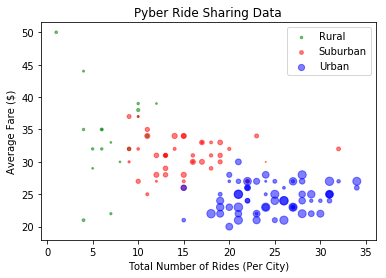

In [47]:
# Final Bubble Plot
plt.scatter(num_rural_city_rides['fare'], round(avg_rural_city_fare['fare'], 0), s=driver_city_count_rural['driver_count'], color='g', alpha=0.5, label='Rural')
plt.scatter(num_suburban_city_rides['fare'], round(avg_suburban_city_fare['fare'], 0), s=driver_city_count_suburban['driver_count'], color='r', alpha=0.5, label='Suburban')
plt.scatter(num_urban_city_rides['fare'], round(avg_urban_city_fare['fare'], 0), s=driver_city_count_urban['driver_count'], color='b', alpha=0.5, label='Urban')

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data")

plt.legend(loc='best')

plt.savefig("Pyber Ride Sharing Data")
plt.show()

In [17]:
# Total Rides by City Type
reformatted_merged_driver_data = merged_driver_data[['fare', 'type']]
city_type_merge = reformatted_merged_driver_data.groupby('type')
total_rides_city_type_merge = city_type_merge.count()

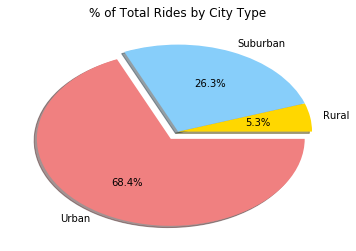

In [46]:
# % of Total Rides by City Type
labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(total_rides_city_type_merge, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True)

plt.title('% of Total Rides by City Type')

plt.savefig('% of Total Rides by City Type')

In [32]:
# Total Drivers by City Type
driver_count_data = merged_driver_data[['city','driver_count', 'type']]

In [33]:
# Urban Total Drivers
driver_count_urban = driver_count_data.loc[driver_count_data['type'] == 'Urban']
driver_count_urban_group = driver_count_urban.groupby('city')
driver_count_per_city_urban = driver_count_urban_group.max()
total_drivers_urban = driver_count_per_city_urban['driver_count'].sum()

In [34]:
# Suburban Total Drivers
driver_count_suburban = driver_count_data.loc[driver_count_data['type'] == 'Suburban']
driver_count_suburban_group = driver_count_suburban.groupby('city')
driver_count_per_city_suburban = driver_count_suburban_group.max()
total_drivers_suburban = driver_count_per_city_suburban['driver_count'].sum()

In [35]:
# Rural Total Drivers
driver_count_rural = driver_count_data.loc[driver_count_data['type'] == 'Rural']
driver_count_rural_group = driver_count_rural.groupby('city')
driver_count_per_city_rural = driver_count_rural_group.max()
total_drivers_rural = driver_count_per_city_rural['driver_count'].sum()

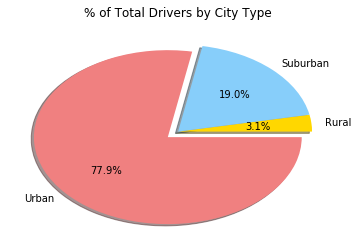

In [45]:
# % of Total Drivers by City Type
labels = ['Rural', 'Suburban', 'Urban']
values = [total_drivers_rural, total_drivers_suburban, total_drivers_urban]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

plt.pie(values, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True)

plt.title('% of Total Drivers by City Type')

plt.savefig('% of Total Drivers by City Type')

In [37]:
# Total Fares by City Type
total_fares_data = merged_driver_data[['city','fare', 'type']]

In [38]:
# Urban Total Fares
fares_urban = total_fares_data.loc[total_fares_data['type'] == 'Urban']
fares_urban_group = fares_urban.groupby('city')
urban_fares = fares_urban_group.max()
total_urban_fares = urban_fares['fare'].sum()

In [39]:
# Suburban Total Fares
fares_suburban = total_fares_data.loc[total_fares_data['type'] == 'Suburban']
fares_suburban_group = fares_suburban.groupby('city')
suburban_fares = fares_suburban_group.max()
total_suburban_fares = suburban_fares['fare'].sum()

In [40]:
# Rural Total Fares
fares_rural = total_fares_data.loc[total_fares_data['type'] == 'Rural']
fares_rural_group = fares_rural.groupby('city')
rural_fares = fares_rural_group.max()
total_rural_fares = rural_fares['fare'].sum()

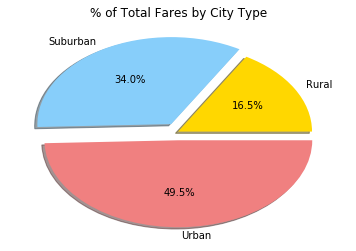

In [44]:
# % of Total Fares by City Type
labels = ['Rural', 'Suburban', 'Urban']
fares_values = [total_rural_fares, total_suburban_fares, total_urban_fares]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0.1)

plt.pie(fares_values, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True)

plt.title('% of Total Fares by City Type')

plt.savefig('% of Total Fares by City Type')